# How We Like to Learn

- [GitHub Repository](https://github.com/denisecase/datafun-03-discussion)

## First Attempt

In this example, we do a quick look, and don't use the wordcloud package (as it is not on the allow list for Voila)

Note: you may need to restart the kernel to use updated packages.


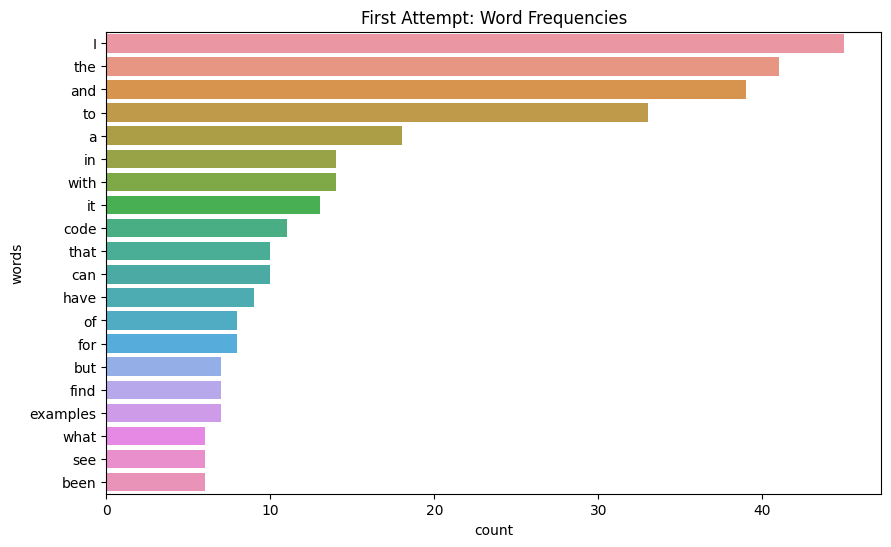

In [26]:
%pip install --quiet pandas matplotlib seaborn nltk ipywidgets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

long_string = ''' demonstration/videos and examples (seeing and executing example code)
 Dynamic visualization is   the learning outcome that I find it most effective.
 Google because it can cover any topic and in several different ways
 Having example code in front of me that I am able to edit and mess around with makes all the difference in the world. I can pull it apart and test different pieces. Being able to web search specific errors and see that someone else has already had and solved an error that I am working on is invaluable. If nothing else I can get a starting point for fixing my error. And finally VIDEOS, I learn so much from watching someone else work through something and code is no exception. Seeing their process and being able to re-watch something as many times as I need to get it helps a lot. 
 highly dependent on material, I like hands-on coding and reading though
 Honestly it's still overwhelming for me but using the book and practicing on the examples in Anaconda Prompt helps a little.
 I believe their will be no standard or constant resource where we can find everything, we need to do research and find where we are getting good content from different sources about the topic. Simply explore and find good content.
 I find that Github makes the most sense. I understand code but until it has been run it’s hard to know the outcomes.
 I find that practice and the GitHub references make the most sense for me. I have to see what the code is doing and how it works.
 I find YouTube videos to be very helpful and doing the peer review after each project allows me to see how other students have used different functions, etc. The more I practice with the projects, the more I learn, also so being hands-on definitely helps. 
 I found some YouTube channel they teach coding step by step.
 I have been having good luck reading the textbook and coding along with the examples.  This has been a great way to introduce concepts.  For me, there hasn't been anything more effective than working through the example code in the projects, messing with it, and seeing what happens.  I'm a "learn-by-doing" person so I have to make sure to actually work with the code being presented in the textbook.  If I just try to read it and remember, the concepts won't stick.
 I like videos that show a step by step process and explain every little thing along the way.  Multiple examples are helpful, starting with the basics and then building on that.  Seeing it in real time in a video is helpful to me.  Book examples can be good as well if they have a good description of why things are what they are, but you still just see the end first and then are given a description.  I need to see it little by little and understand the logic as it's being created to really understand what's going on.
 I like youtube videos for complex questions and online articles for simple questions
 I mainly use the steps in the text book and instructions but when errors and I need more examples to understand the concept better I use chat gpt and literally change 1 thing to see what it how what it produces. A lot of errors but i usually get to working.
 I personally like examples that I can follow or videos with step by step instructions (following along while doing the work). 
 I prefer a combination of reading, examples, and then a heavy amount of practice (trial and error even). The first couple I listed give me something to go off of, but then I really start to understand concepts when I'm spending detailed time playing around with the code and using it. 
 I prefer books that I can reference with examples I can work through. I like videos, but often they move through the information faster than I can process and I have to constantly rewind which I feel takes more time to learn.
 I think a recorded class might be very helpful and once in a while we have a scheduled online class where we can ask questions directly with the lecturer.
 I think trying for myself and having example code to work with is the most helpful
 Practice! Practice! Practice!
 reading coupled with coding practice and supplemental online reading and videos. I like to try to intake new knowledge in different ways which helps it stick better in my mind.
 textbook and web
 The resources I've been using the most are the textbook and the example code in the module repositories. I also try to spend at least a little time studying every day to keep everything fresh in my mind.
 The textbook has been helpful, and coding with the examples, or using RealPython.com. There are also times that I reach out to some friends for advice. It helps to have a soundboard when deciding what to make the code do for my domain. F1 has a lot of information to play with. A lot of the time, I usually have to make a draft of my code and play with it outside the original repo.
 Watching YouTube videos. I learn better from watching examples.
'''

# Split the string into a list of words
word_list = long_string.split()

# Convert the word list into a DataFrame
df = pd.DataFrame({"words": word_list})

# Count the occurrences of each word
word_counts = df['words'].value_counts()

# Plot the frequencies using seaborn's barplot function
plt.figure(figsize=(10,6))
sns.barplot(x=word_counts[:20], y=word_counts.index[:20])
plt.title("First Attempt: Word Frequencies")
plt.show()


## Improved Visualization

In this example, we use the list of "stop word" (words that are not useful for analysis) to improve the visualization. We get this and more from the nltk ("natural language toolkit") library.



Note: you may need to restart the kernel to use updated packages.


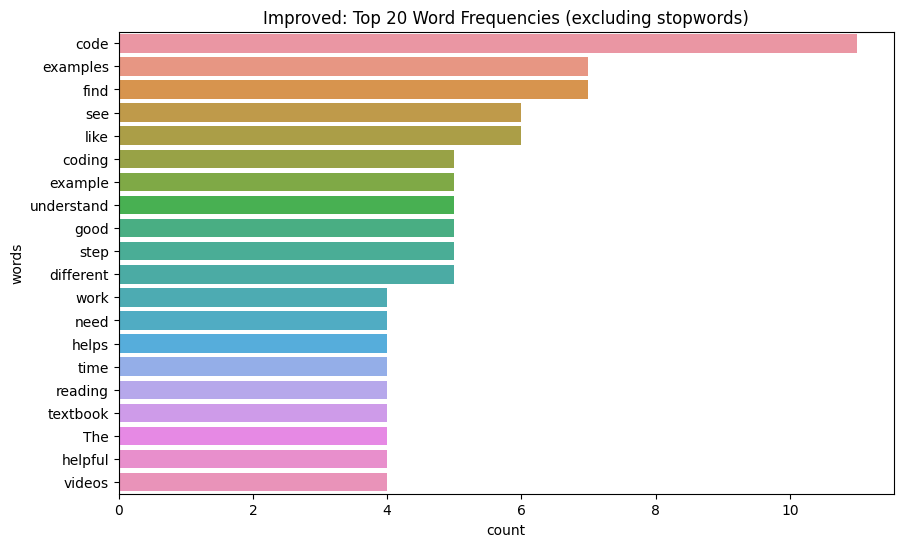

In [27]:
%pip install --quiet pandas matplotlib seaborn nltk ipywidgets


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords', quiet=True)
from ipywidgets import interact

long_string = ''' demonstration/videos and examples (seeing and executing example code)
 Dynamic visualization is   the learning outcome that I find it most effective.
 Google because it can cover any topic and in several different ways
 Having example code in front of me that I am able to edit and mess around with makes all the difference in the world. I can pull it apart and test different pieces. Being able to web search specific errors and see that someone else has already had and solved an error that I am working on is invaluable. If nothing else I can get a starting point for fixing my error. And finally VIDEOS, I learn so much from watching someone else work through something and code is no exception. Seeing their process and being able to re-watch something as many times as I need to get it helps a lot. 
 highly dependent on material, I like hands-on coding and reading though
 Honestly it's still overwhelming for me but using the book and practicing on the examples in Anaconda Prompt helps a little.
 I believe their will be no standard or constant resource where we can find everything, we need to do research and find where we are getting good content from different sources about the topic. Simply explore and find good content.
 I find that Github makes the most sense. I understand code but until it has been run it’s hard to know the outcomes.
 I find that practice and the GitHub references make the most sense for me. I have to see what the code is doing and how it works.
 I find YouTube videos to be very helpful and doing the peer review after each project allows me to see how other students have used different functions, etc. The more I practice with the projects, the more I learn, also so being hands-on definitely helps. 
 I found some YouTube channel they teach coding step by step.
 I have been having good luck reading the textbook and coding along with the examples.  This has been a great way to introduce concepts.  For me, there hasn't been anything more effective than working through the example code in the projects, messing with it, and seeing what happens.  I'm a "learn-by-doing" person so I have to make sure to actually work with the code being presented in the textbook.  If I just try to read it and remember, the concepts won't stick.
 I like videos that show a step by step process and explain every little thing along the way.  Multiple examples are helpful, starting with the basics and then building on that.  Seeing it in real time in a video is helpful to me.  Book examples can be good as well if they have a good description of why things are what they are, but you still just see the end first and then are given a description.  I need to see it little by little and understand the logic as it's being created to really understand what's going on.
 I like youtube videos for complex questions and online articles for simple questions
 I mainly use the steps in the text book and instructions but when errors and I need more examples to understand the concept better I use chat gpt and literally change 1 thing to see what it how what it produces. A lot of errors but i usually get to working.
 I personally like examples that I can follow or videos with step by step instructions (following along while doing the work). 
 I prefer a combination of reading, examples, and then a heavy amount of practice (trial and error even). The first couple I listed give me something to go off of, but then I really start to understand concepts when I'm spending detailed time playing around with the code and using it. 
 I prefer books that I can reference with examples I can work through. I like videos, but often they move through the information faster than I can process and I have to constantly rewind which I feel takes more time to learn.
 I think a recorded class might be very helpful and once in a while we have a scheduled online class where we can ask questions directly with the lecturer.
 I think trying for myself and having example code to work with is the most helpful
 Practice! Practice! Practice!
 reading coupled with coding practice and supplemental online reading and videos. I like to try to intake new knowledge in different ways which helps it stick better in my mind.
 textbook and web
 The resources I've been using the most are the textbook and the example code in the module repositories. I also try to spend at least a little time studying every day to keep everything fresh in my mind.
 The textbook has been helpful, and coding with the examples, or using RealPython.com. There are also times that I reach out to some friends for advice. It helps to have a soundboard when deciding what to make the code do for my domain. F1 has a lot of information to play with. A lot of the time, I usually have to make a draft of my code and play with it outside the original repo.
 Watching YouTube videos. I learn better from watching examples.
'''

# Split the string into a list of words
word_list = long_string.split()

# Convert the word list into a DataFrame
df = pd.DataFrame({"words": word_list})

# If you want to add custom stopwords, you can add them to this list
stop_words = set(stopwords.words('english'))  # use the NLTK stopwords

# Add custom stopwords
stop_words.update(['I'])

# Filter out the stopwords using ~ for "not"
df = df[~df['words'].isin(stop_words)]

# Count the occurrences of each word
word_counts = df['words'].value_counts()


# Define a function that takes an integer input and plots the top n words
def plot_top_words(n):
    plt.figure(figsize=(10,6))
    sns.barplot(x=word_counts[:n], y=word_counts.index[:n])
    plt.title(f"Improved: Top {n} Word Frequencies (excluding stopwords)")

plot_top_words(20)  

## Interactive Chart (See it in Google Colab)

We can also create an interactive chart using ipywidgets.
In this case, we'll add a slider and connect it to the number of words we want to see in the chart.

Interactive widgets work when published with **[Google Colab](https://colab.research.google.com/github/denisecase/datafun-03-discussion/blob/main/learning.ipynb)**, to **Voila**, or when running locally using the `voila learning.ipynb` command in your virtual environment. They may work when running the notebook in VS Code. 

GitHub and Binder do not currently support interactive widgets, so you might see the chart render, but you won't be able to interact with it.

Note: you may need to restart the kernel to use updated packages.


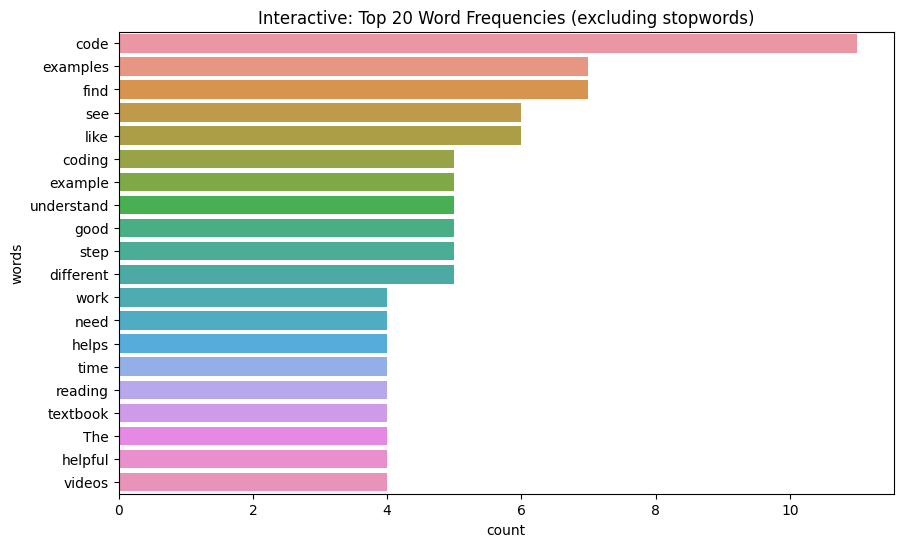

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_top_words(n)>

In [28]:
%pip install --quiet pandas matplotlib seaborn nltk ipywidgets


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from ipywidgets import interact
nltk.download('stopwords', quiet=True)


long_string = ''' demonstration/videos and examples (seeing and executing example code)
 Dynamic visualization is   the learning outcome that I find it most effective.
 Google because it can cover any topic and in several different ways
 Having example code in front of me that I am able to edit and mess around with makes all the difference in the world. I can pull it apart and test different pieces. Being able to web search specific errors and see that someone else has already had and solved an error that I am working on is invaluable. If nothing else I can get a starting point for fixing my error. And finally VIDEOS, I learn so much from watching someone else work through something and code is no exception. Seeing their process and being able to re-watch something as many times as I need to get it helps a lot. 
 highly dependent on material, I like hands-on coding and reading though
 Honestly it's still overwhelming for me but using the book and practicing on the examples in Anaconda Prompt helps a little.
 I believe their will be no standard or constant resource where we can find everything, we need to do research and find where we are getting good content from different sources about the topic. Simply explore and find good content.
 I find that Github makes the most sense. I understand code but until it has been run it’s hard to know the outcomes.
 I find that practice and the GitHub references make the most sense for me. I have to see what the code is doing and how it works.
 I find YouTube videos to be very helpful and doing the peer review after each project allows me to see how other students have used different functions, etc. The more I practice with the projects, the more I learn, also so being hands-on definitely helps. 
 I found some YouTube channel they teach coding step by step.
 I have been having good luck reading the textbook and coding along with the examples.  This has been a great way to introduce concepts.  For me, there hasn't been anything more effective than working through the example code in the projects, messing with it, and seeing what happens.  I'm a "learn-by-doing" person so I have to make sure to actually work with the code being presented in the textbook.  If I just try to read it and remember, the concepts won't stick.
 I like videos that show a step by step process and explain every little thing along the way.  Multiple examples are helpful, starting with the basics and then building on that.  Seeing it in real time in a video is helpful to me.  Book examples can be good as well if they have a good description of why things are what they are, but you still just see the end first and then are given a description.  I need to see it little by little and understand the logic as it's being created to really understand what's going on.
 I like youtube videos for complex questions and online articles for simple questions
 I mainly use the steps in the text book and instructions but when errors and I need more examples to understand the concept better I use chat gpt and literally change 1 thing to see what it how what it produces. A lot of errors but i usually get to working.
 I personally like examples that I can follow or videos with step by step instructions (following along while doing the work). 
 I prefer a combination of reading, examples, and then a heavy amount of practice (trial and error even). The first couple I listed give me something to go off of, but then I really start to understand concepts when I'm spending detailed time playing around with the code and using it. 
 I prefer books that I can reference with examples I can work through. I like videos, but often they move through the information faster than I can process and I have to constantly rewind which I feel takes more time to learn.
 I think a recorded class might be very helpful and once in a while we have a scheduled online class where we can ask questions directly with the lecturer.
 I think trying for myself and having example code to work with is the most helpful
 Practice! Practice! Practice!
 reading coupled with coding practice and supplemental online reading and videos. I like to try to intake new knowledge in different ways which helps it stick better in my mind.
 textbook and web
 The resources I've been using the most are the textbook and the example code in the module repositories. I also try to spend at least a little time studying every day to keep everything fresh in my mind.
 The textbook has been helpful, and coding with the examples, or using RealPython.com. There are also times that I reach out to some friends for advice. It helps to have a soundboard when deciding what to make the code do for my domain. F1 has a lot of information to play with. A lot of the time, I usually have to make a draft of my code and play with it outside the original repo.
 Watching YouTube videos. I learn better from watching examples.
'''

# Split the string into a list of words
word_list = long_string.split()

# Convert the word list into a DataFrame
df = pd.DataFrame({"words": word_list})

# If you want to add custom stopwords, you can add them to this list
stop_words = set(stopwords.words('english'))  # use the NLTK stopwords

# Add custom stopwords
stop_words.update(['I'])

# Filter out the stopwords using ~ for "not"
df = df[~df['words'].isin(stop_words)]

# Count the occurrences of each word
word_counts = df['words'].value_counts()


# Define a function that takes an integer input and plots the top n words
def plot_top_words(n):
    plt.figure(figsize=(10,6))
    sns.barplot(x=word_counts[:n], y=word_counts.index[:n])
    plt.title(f"Interactive: Top {n} Word Frequencies (excluding stopwords)")

plot_top_words(20)  

# Call interact and pass in the function name without parentheses;
# we don't want to call the function, we just want to connect that logic to the interactive slider.
interact(plot_top_words, n=(1, 30))